In [15]:
import pandas as pd 
# Import the pandas library for data manipulation and analysis

import numpy as np 
# Import NumPy for numerical operations, especially arrays and mathematical functions

import matplotlib.pyplot as plt 
# Import Matplotlib's pyplot for plotting graphs and charts

import seaborn as sns
# Import seaborn for advanced data visualisation (built on top of matplotlib)

from sklearn.model_selection import train_test_split 
# Import train_test_split to split the dataset into training and testing sets

from sklearn.linear_model import LogisticRegression 
# Import LogisticRegression model for performing logistic regression

from sklearn.metrics import accuracy_score

from sklearn.impute import SimpleImputer 
# Import SimpleImputer to fill in missing values (e.g. using mean, median, or most frequent value)

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
# Import encoders: OneHotEncoder for nominal categorical data, OrdinalEncoder for ordered categorical data 



from sklearn.compose import ColumnTransformer

# Import ColumnTransformer to apply different preprocessing steps to specific columns

In [16]:
df= pd.read_csv('loan.csv') # load the dataset

In [17]:
df.head() # dissplay the first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.info  # Get comprehensive information about the dataset

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [19]:
df.describe()  # Display basic statistics for numerical columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
df.isnull().sum()  # Check for missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

df = df.drop(df.index[7])

# Create imputers
mode_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

# Apply imputers to categorical columns
# Impute categorical columns with mode (most frequent value)
df[['Dependents', 'Self_Employed', 'Married', 'Gender']] = mode_imputer.fit_transform(df[['Credit_History', 'Self_Employed', 'Married', 'Gender']])

# Apply imputers to numerical columns
df[['LoanAmount']] = mean_imputer.fit_transform(df[['LoanAmount']])
df[['Loan_Amount_Term','Credit_History']] = median_imputer.fit_transform(df[['Loan_Amount_Term','Credit_History']])


In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
# Create an explicit copy to avoid the warning
df = df.copy()

# 
# Binary encoding for categorical variables
# Convert categorical variables to numerical (0 and 1)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Handle 'Dependents' column - convert '3+' to 3 and make it integer
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,1,1,0,5849,0.0,146.392555,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,1,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,1,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# Define columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education']

X= df.drop('Loan_Status', axis=1) # Features (all columns except target)
y=df['Loan_Status']   # Target variable (what we want to predict)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(
    X,y,
    test_size=0.2,   # 20% for testing, 80% for training
    random_state=42   # For reproducible results
)



# Create complete ML pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
             # StandardScaler transforms features to have mean=0 and std=1
        ('num_scaler', StandardScaler(), numerical_cols),


      
        # 'passthrough' means keep these columns as-is
        ('cat_passthrough', 'passthrough', categorical_cols)
    ], remainder='drop')),
      # LogisticRegression for binary classification (Loan approved/rejected)
    # random_state=0 ensures reproducible results
    ('model', LogisticRegression(random_state=0))
])

In [26]:
pipeline.fit(X_train, y_train)
# 1. Calculate scaling parameters on training data
# 2. Transform training data
# 3. Train the logistic regression model

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_scaler', ...), ('cat_passthrough', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:

# Make predictions
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))



Training Accuracy: 0.810204081632653
Test Accuracy: 0.8130081300813008


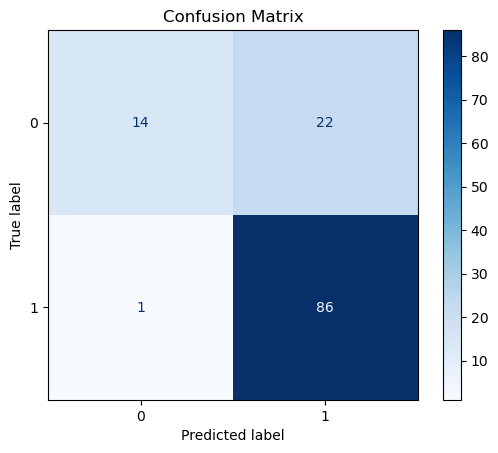

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Detailed classification metrics
print("Classification Report:")
print(classification_report(y_test, test_predictions))
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.39      0.55        36
           1       0.80      0.99      0.88        87

    accuracy                           0.81       123
   macro avg       0.86      0.69      0.72       123
weighted avg       0.84      0.81      0.78       123


Confusion Matrix:
[[14 22]
 [ 1 86]]
